<a href="https://colab.research.google.com/github/TesNikk/ML-DL/blob/main/BanglaSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import re
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
bn_sentiment_data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
#bn_sentiment_data = pd.read_csv('/kaggle/input/aiquest-bangla-sentiment-analysis-competition/train.csv')
print(f"Training data shape: {bn_sentiment_data.shape}")
print(f"Class distribution: ")
display(bn_sentiment_data)
print(bn_sentiment_data['sentiment'].value_counts())


Training data shape: (189, 3)
Class distribution: 


,id,text,sentiment
0,0,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী। তাদে...,positive
1,1,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,neutral
2,2,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য। আম...,negative
3,3,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে। জরুরি সময়...,negative
4,4,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না। আমি আম...,negative
...,...,...,...
184,184,কোম্পানির হেল্পলা ইন নম্বর কি? আমার কিছু তথ্য ...,neutral
185,185,ব্যাংকে র নতুন ফি স্ট্রাকচার খুবই বেশি। এটা গ্...,negative
186,186,কোম্পানির কর্মচারীরা খুব সহযোগী। যখনই প্রয়োজন...,positive
187,187,কোম্পানির অ্যাপ বারবার ক্র্যাশ করে? গুরুত্বপূর...,negative


sentiment
negative    65
neutral     64
positive    60
Name: count, dtype: int64


#Preprocessing

Count missing values in each column

In [ ]:
missing_values = bn_sentiment_data.isna().sum()
print(f"Missing values: {missing_values}")
#Remove rows with NaN values
bn_sentiment_data = bn_sentiment_data.dropna()


Missing values: id           0
text         0
sentiment    0
dtype: int64


In [ ]:
def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text.lower().strip()

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = ""
    for char in my_str:
      if char not in punctuations:
        no_punct = no_punct + char

    return no_punct

def joining(text):
  out = ' '.join(text)
  return out

def preprocessing(text):
  out = remove_punctuations(replace_strings(text))
  return out

In [ ]:
bn_sentiment_data['cleanText'] = bn_sentiment_data.text.apply(
    lambda x: preprocessing(str(x))
)

stopwords removal

In [ ]:
bn_stop_word = pd.read_excel('/content/drive/MyDrive/Datasets/stopwords_bangla.xlsx')
#bn_stop_word =pd.read_excel('/kaggle/input/bangla-stopwords/stopwords_bangla.xlsx')
stopwords = bn_stop_word['words'].tolist()
display(stopwords)

['অই',
 'অগত্যা',
 'অত: পর',
 'অতএব',
 'অথচ',
 'অথবা',
 'অধিক',
 'অধীনে',
 'অধ্যায়',
 'অনুগ্রহ',
 'অনুভূত',
 'অনুযায়ী',
 'অনুরূপ',
 'অনুসন্ধান',
 'অনুসরণ',
 'অনুসারে',
 'অনুসৃত',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অন্যত্র',
 'অন্যভাবে',
 'অন্যান্য',
 'অপেক্ষাকৃতভাবে',
 'অবধি',
 'অবশ্য',
 'অবশ্যই',
 'অবস্থা',
 'অবিলম্বে',
 'অভ্যন্তরস্থ',
 'অর্জিত',
 'অর্থাত',
 'অসদৃশ',
 'অসম্ভাব্য',
 'আইন',
 'আউট',
 'আক্রান্ত',
 'আগামী',
 'আগে',
 'আগেই',
 'আগ্রহী',
 'আছে',
 'আজ',
 'আট',
 'আদেশ',
 'আদ্যভাগে',
 'আন্দাজ',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদিগের',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'আশি',
 'আশু',
 'আসা',
 'আসে',
 'ই',
 'ইচ্ছা',
 'ইচ্ছাপূর্বক',
 'ইতিমধ্যে',
 'ইতোমধ্যে',
 'ইত্যাদি',
 'ইশারা',
 'ইহা',
 'ইহাতে',
 'উক্তি',
 'উচিত',
 'উচ্চ',
 'উঠা',
 'উত্তম',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'উপলব্ধ',
 'উপায়',
 'উভয়',
 'উল্লেখ',
 'উল্লেখযোগ্যভাবে',
 'উহার',
 'ঊর্ধ্বতন',
 'এ',
 'এপর্যন্ত',
 'এঁদের',
 'এঁরা',
 'এই',
 'এইগুলো',
 'এইভাবে',
 'এক',
 'একই

In [ ]:
def stopwordRemoval(text):
  x = str(text)
  l = x.split(' ')
  stm = [elem for elem in l if elem not in stopwords]
  out = ' '.join(stm)
  return out

In [ ]:
bn_sentiment_data['cleanText'] = bn_sentiment_data.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# Stemming

In [ ]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
#stemmer function
def stemText(x):
  stmr = stemmer.BanglaStemmer()
  words = x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
bn_sentiment_data['cleanText'] = bn_sentiment_data.cleanText.apply(
    lambda x: stemText(str(x))
)
display(bn_sentiment_data)

applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied 

,id,text,sentiment,cleanText
0,0,ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী। তাদে...,positive,ব্যাংক কর্মী অত্যন্ত দক্ষ সহযোগী পেশাদারিত্ব ম...
1,1,আমি কোম্পানির নতুন প্রোডাক্ট সম্পর্কে জানতে চা...,neutral,কোম্পানির প্রোডাক্ট সম্পর্ চাই
2,2,কোম্পানির সেবা মানুষের টাকা নষ্ট করার জন্য। আম...,negative,কোম্পানির সেবা মানুষ টাকা নষ্ট থাক চাই
3,3,ব্যাংকের সিস্টেম প্রায়ই ডাউন থাকে। জরুরি সময়...,negative,ব্যাংক সিস্টেম ডাউন জরুরি সময়ে অ্যাকাউন্ট অ্য...
4,4,ব্যাংকের নোটিফিকেশন সিস্টেম কাজ করে না। আমি আম...,negative,ব্যাংক নোটিফিকেশন সিস্টেম না ট্রানজেকশন আপডেট ...
...,...,...,...,...
184,184,কোম্পানির হেল্পলা ইন নম্বর কি? আমার কিছু তথ্য ...,neutral,কোম্পানির হেল্পলা ইন নম্বর তথ্য দরক
185,185,ব্যাংকে র নতুন ফি স্ট্রাকচার খুবই বেশি। এটা গ্...,negative,ব্যাং র ফি স্ট্রাকচ খুব গ্রাহক অতিরিক্ত চাপ তৈরি
186,186,কোম্পানির কর্মচারীরা খুব সহযোগী। যখনই প্রয়োজন...,positive,কোম্পানির কর্মচারী সহযোগী তখন সাহায্য
187,187,কোম্পানির অ্যাপ বারবার ক্র্যাশ করে? গুরুত্বপূর...,negative,কোম্পানির অ্যাপ বারবার ক্র্যাশ গুরুত্বপূর্ণ লে...


In [ ]:
label_encoder = LabelEncoder()
bn_sentiment_data['sentiment_encoded'] = label_encoder.fit_transform(bn_sentiment_data['sentiment'])

In [ ]:
X = bn_sentiment_data['cleanText']
y = bn_sentiment_data['sentiment_encoded']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


#Training the model



Various Models

In [ ]:
classifiers = {
    'Naive Bayes':{
        'classifier': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf',MultinomialNB())
        ]),
        'params':{
            'tfidf__max_features':[1000,5000,10000],
            'tfidf__ngram_range':[(1,1),(1,2)],
            'clf__alpha': [0.1,0.5,1.0]
        }
    },
    'Linear SVM':{
        'classifier': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf',LinearSVC())
        ]),
        'params':{
            'tfidf__max_features':[1000,5000,10000],
            'tfidf__ngram_range':[(1,1),(1,2)],
            'clf__C': [0.1,1,10],
            'clf__loss': ['hinge', 'squared_hinge']
        }
    },
     'Logistic Regression':{
        'classifier': Pipeline([
            ('tfidf',TfidfVectorizer()),
            ('clf',LogisticRegression())
        ]),
        'params':{
            'tfidf__max_features':[1000,5000,10000],
            'tfidf__ngram_range':[(1,1),(1,2)],
            'clf__C': [0.1,1,10],
            'clf__solver': ['liblinear','saga']
        }
    }
}

# Hyperparameter tuning

In [ ]:
results = {}
for name, model_info in classifiers.items():
  print(f"\nTuning {name}")
  #perform grid search
  grid_search = GridSearchCV(
      estimator = model_info['classifier'],
      param_grid=model_info['params'],
      cv = 5,
      scoring = 'accuracy',
      n_jobs=1
  )
  #Fit grid Search
  grid_search.fit(X_train,y_train)

  #Best Model
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  #predictions
  y_pred = best_model.predict(X_test)

  #Metrics
  accuracy = accuracy_score(y_test,y_pred)

  report = classification_report(
      y_test,
      y_pred,
      target_names = label_encoder.classes_
  )


Tuning Naive Bayes

Tuning Linear SVM

Tuning Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [ ]:
results[name] ={
    'best_params': best_params,
    'accuracy': accuracy,
    'classification_report': report
}


print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy: .4f}")
print(f"Classification Report:")
print(report)

Best Parameters: {'clf__C': 10, 'clf__solver': 'liblinear', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}
Accuracy:  0.8158
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.77      0.83        13
     neutral       0.69      0.92      0.79        12
    positive       0.91      0.77      0.83        13

    accuracy                           0.82        38
   macro avg       0.84      0.82      0.82        38
weighted avg       0.84      0.82      0.82        38



In [ ]:
def predict_sentiment(text):
  cleanedText = preprocessing(str(text))
  cleanedText = preprocessing(str(cleanedText))
  cleanedText = preprocessing(str(cleanedText))

  pred = best_model.predict([cleanedText])
  sentiment_label = label_encoder.inverse_transform(pred)
  return sentiment_label[0]

print(predict_sentiment("ব্যাংকের কর্মীরা অত্যন্ত দক্ষ এবং সহযোগী"))

positive


#Make predictions on all training data

In [ ]:
predictions = best_model.predict(X)
prediction_label = label_encoder.inverse_transform(predictions)
display(prediction_label)

array(['positive', 'neutral', 'negative', 'negative', 'negative',
       'neutral', 'neutral', 'negative', 'positive', 'neutral',
       'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'negative', 'neutral', 'positive',
       'neutral', 'negative', 'positive', 'neutral', 'negative',
       'neutral', 'positive', 'negative', 'negative', 'positive',
       'neutral', 'positive', 'negative', 'neutral', 'positive',
       'neutral', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'neutral', 'neutral', 'positive', 'positive',
       'neutral', 'positive', 'neutral', 'negative', 'positive',
       'neutral', 'positive', 'positive', 'negative', 'positive',
       'neutral', 'positive', 'neutral', 'negative', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'negative',
       'positive', 'neutral', 'negative', 'negative', 'positive',


In [ ]:
print(bn_sentiment_data.columns)
submission = pd.DataFrame({
    'id': bn_sentiment_data['id'],
    'sentiment': prediction_label
})



Index(['id', 'text', 'sentiment', 'cleanText', 'sentiment_encoded'], dtype='object')


#Save the submission file

In [ ]:
submission.to_csv('submission.csv',index = False)
print(f"Created submission.csv with {len(submission)} rows")

Created submission.csv with 189 rows


#Display statistcs about the predictions


Distribution of predictions: 
sentiment
neutral     68
negative    63
positive    58
Name: count, dtype: int64


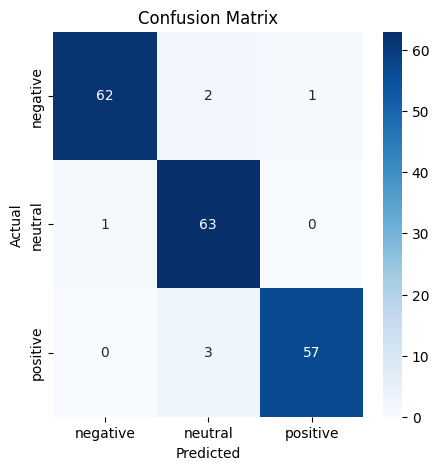

In [ ]:
print("\nDistribution of predictions: ")
print(submission['sentiment'].value_counts())
cm = metrics.confusion_matrix(bn_sentiment_data['sentiment'], prediction_label)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()